# FindDefault (Prediction of Credit Card fraud) - Capstone Project


## Problem Statement
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 



### Introduction:
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


In this Project, We have to build a classification model to predict whether a transaction is fraudulent or not. We will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.  Let's start!

### Project Outline:
- **Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
- **Data Cleaning:** This might include standardization, handling the missing values and outliers in the data. 
- **Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
- **Feature Engineering:** Create new features or transform the existing features for better performance of the ML Models. 
- **Model Selection:** Choose the most appropriate model that can be used for this project. 
- **Model Training:** Split the data into train & test sets and use the train set to estimate the best model parameters. 
- **Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting. 
- **Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment. 

#### Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#### Understanding the data:

In [2]:
# read the dataset
card_df = pd.read_csv("creditcard.csv")
card_df.head() # showing first 5 records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# showing last 5 records
card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# showing the shape of the dataset
card_df.shape

(284807, 31)

In [5]:
# showing columns in the dataset
card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

This dataset comprises 284,807 rows and 31 columns. Except for the 'Time' and 'Amount' columns, the nature of the remaining columns (V1 to V28) remains undisclosed due to privacy concerns. These undisclosed columns have undergone scaling and PCA transformation (dimensionality reduction technique).

### Exploratory Data Analysis:

#### Data Quality Check

In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
card_df.isnull().values.any()

False

- As per the above info about the dataset, All the columns are of float datatype except the 'Class' which int in datatype.
- Notably, there are no missing values present in the dataset.

In [8]:
# checking the numerical columns description
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
# Checking the 'Class' column's values distribution
classes = card_df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Checking for the % distribution of Fraud and Non-frauds
classes_nf_share = classes[0]/card_df['Class'].count()*100
classes_f_share = classes[1]/card_df['Class'].count()*100
print("Percentage share of Non-fraud records: ", np.round(classes_nf_share,3))
print("Percentage share of Fraud records: ", np.round(classes_f_share,3))

Percentage share of Non-fraud records:  99.827
Percentage share of Fraud records:  0.173


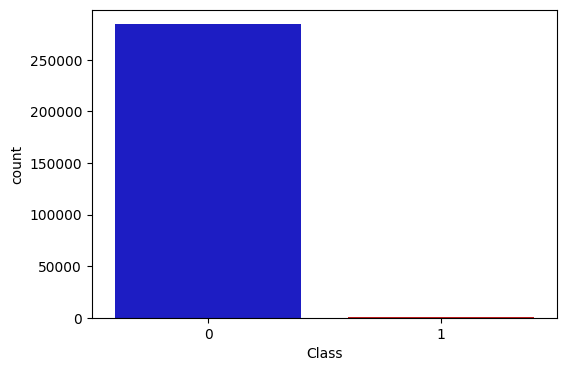

In [11]:
# Create Bar plot to show Fraudulent and Non-fraudulent distribution
plt.figure(figsize=(6,4))
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=card_df, x='Class', palette=colors)
plt.show()

Our dataset exhibits significant class imbalance, with the majority of transactions being non-fraudulent (99.82%). Using this dataset as the foundation for our predictive models and analysis may lead to substantial errors and overfitting. This is because the algorithms may incorrectly assume that most transactions are not fraudulent, compromising their ability to detect genuine fraud patterns. Instead, we aim for our model to discern distinctive patterns indicative of fraudulent activity rather than making assumptions based on class distribution. 

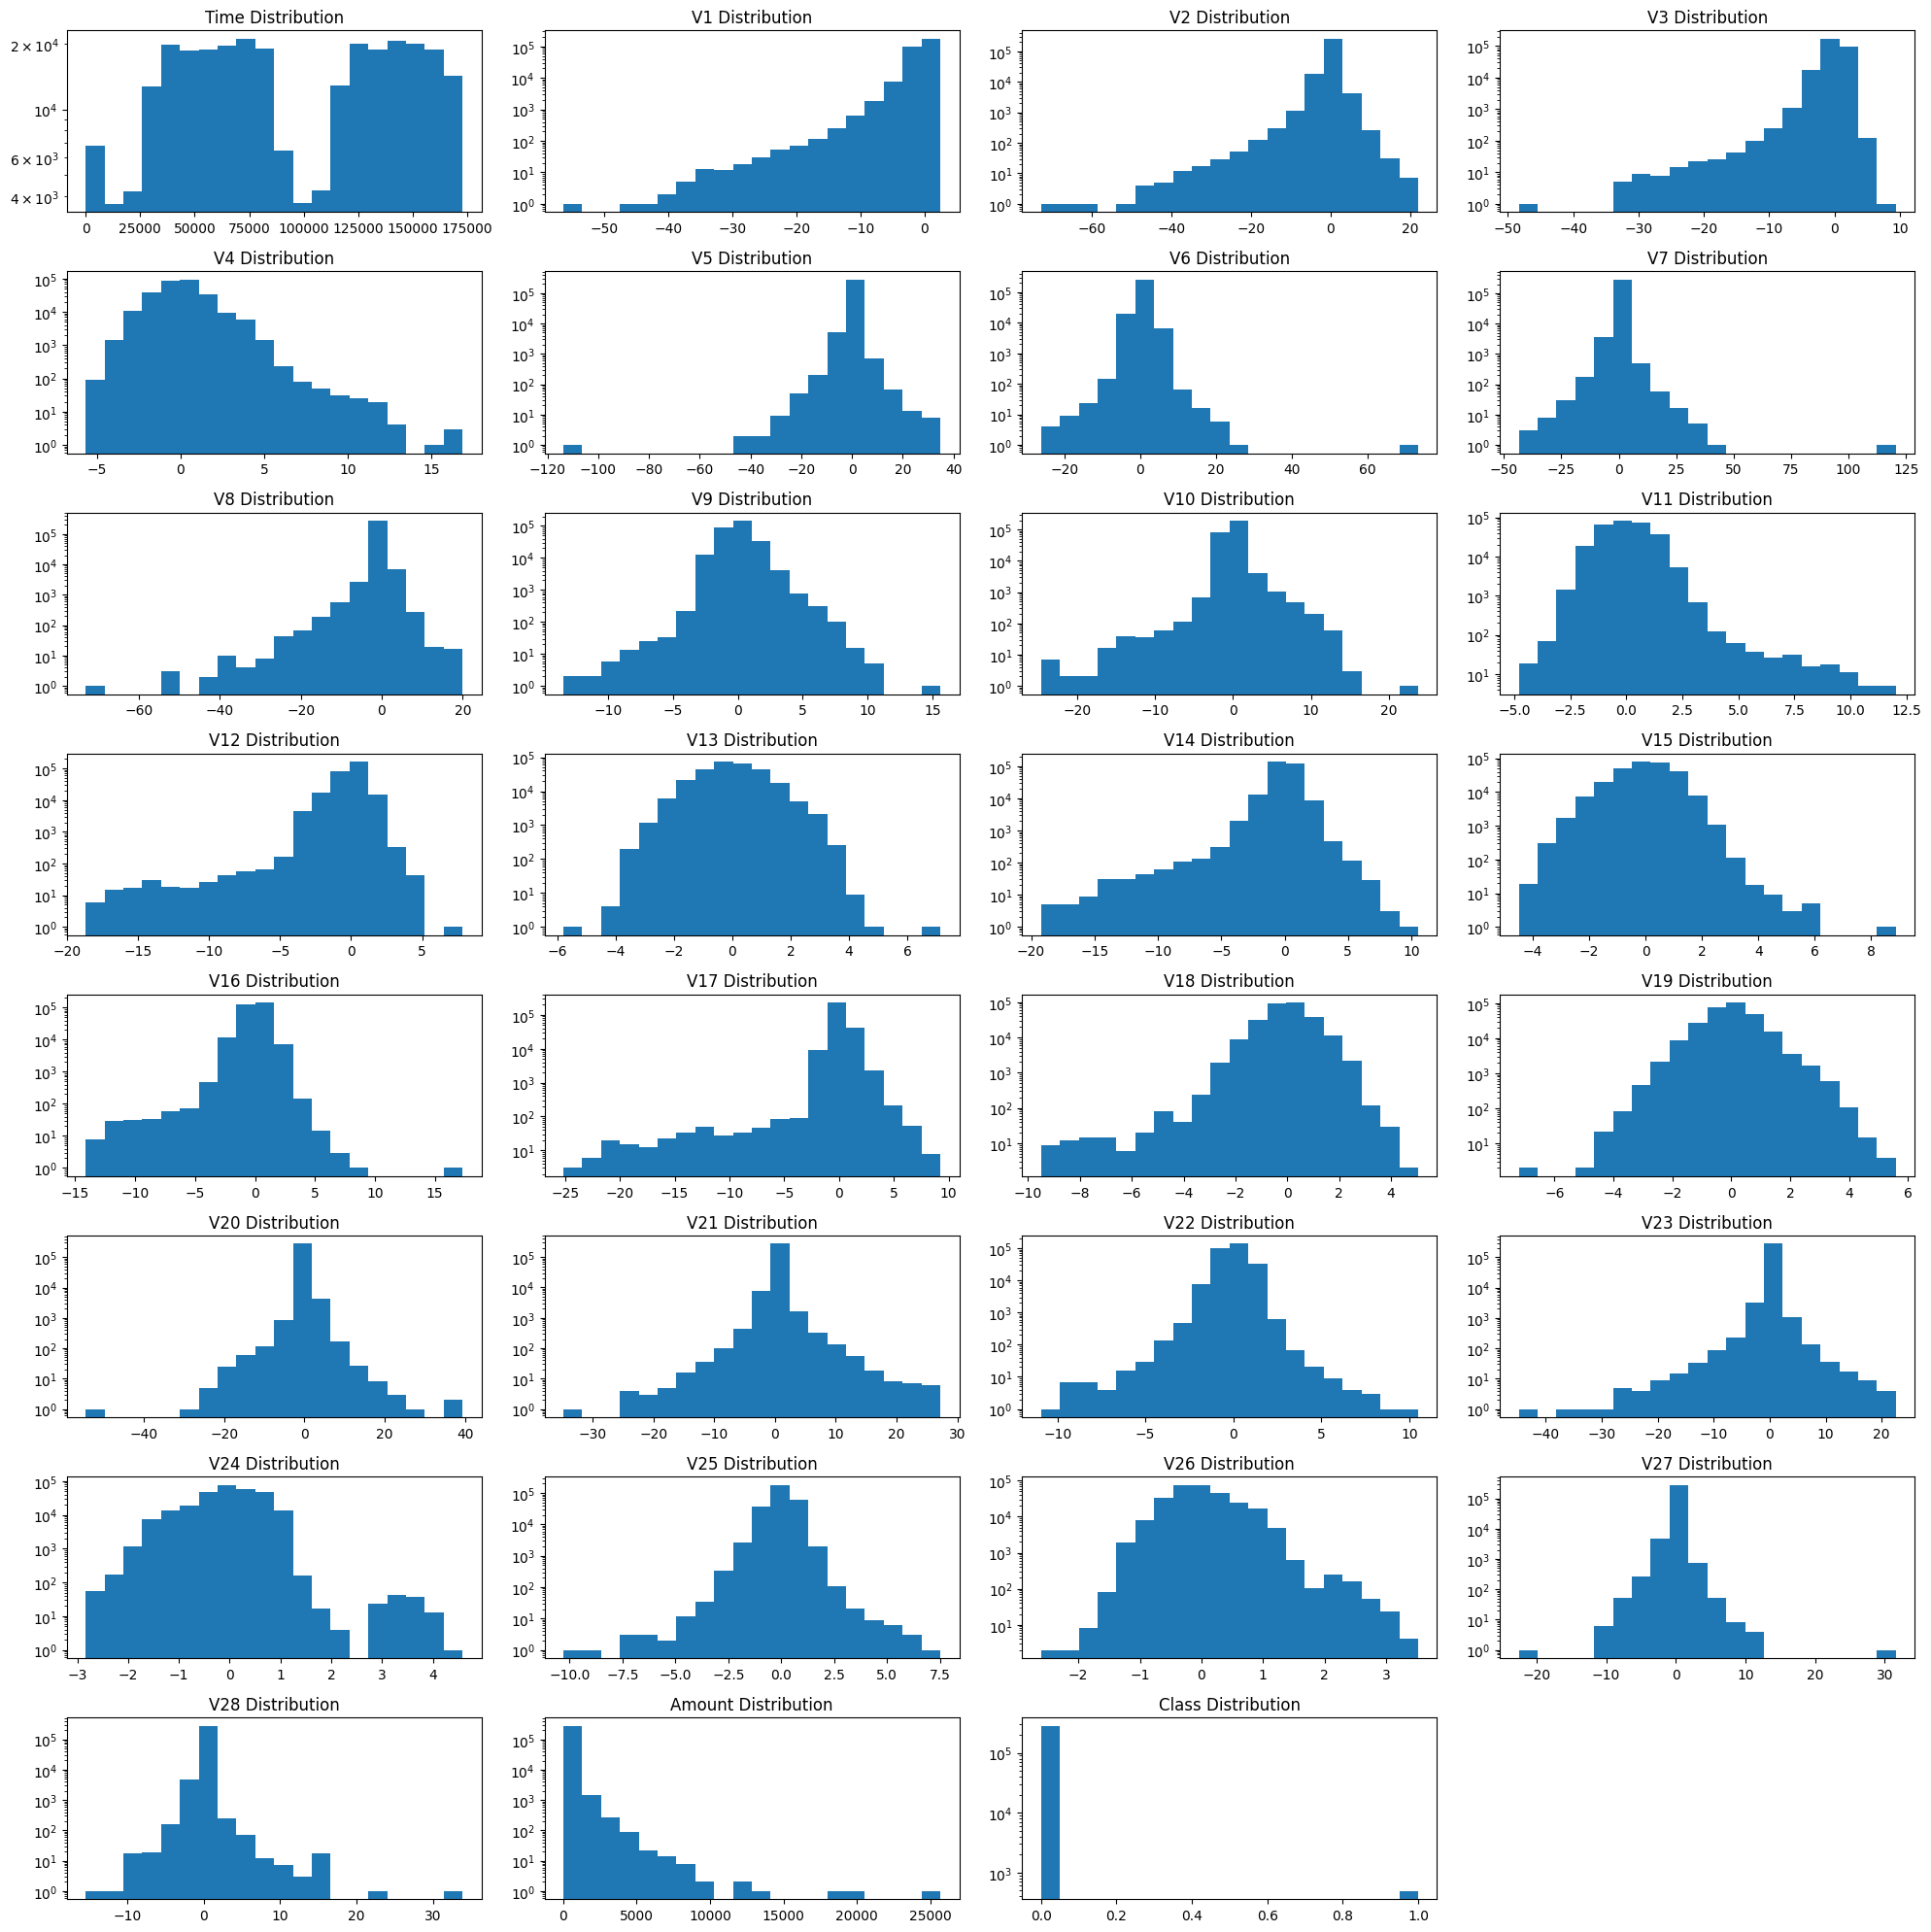

In [12]:
# plot the distribution for each features to check the skewness
def plot_histogram(dataset, features, nrows, ncols):
    fig = plt.figure(figsize = (20,20))
    for n, feature in enumerate(features):
        ax = fig.add_subplot(nrows, ncols, n+1)
        dataset[feature].hist(bins = 20, ax = ax, grid=False)
        ax.set_title(feature + ' Distribution')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

plot_histogram(card_df, card_df.columns, 8,4)

The columns labeled 'V1' to 'V28' have undergone transformation using PCA techniques, while the 'Class' column serves as the target variable. As a result, our primary focus will be on analyzing the 'Time' and 'Amount' columns.

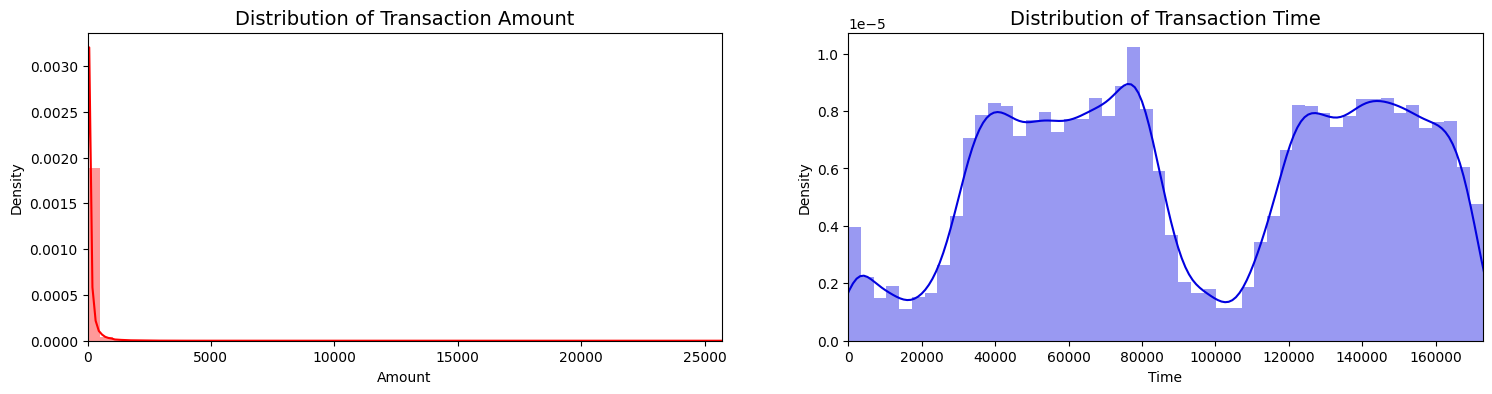

In [13]:
# Checking for the Distribution of Transaction Amount and Time
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(card_df.Amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(card_df.Amount), max(card_df.Amount)])

sns.distplot(card_df.Time, ax=ax[1], color="#0101DF")
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(card_df.Time), max(card_df.Time)])

plt.show()

Based on the distplots illustrating the distribution of Transaction Amount and Time, notable skewness is observed in both columns. The Transaction Amount feature exhibits a right-skewed distribution, indicating a higher frequency of smaller transactions with a tail extending towards larger values. As for the Time distribution, it illustrates transaction timings over a two-day period. Notably, transactions appear to be least frequent during nighttime and peak during daytime hours.

In [14]:
# differntiate dataset as per the Class labels 
fraudulent = card_df[card_df['Class']==1]
non_fraudulent = card_df[card_df['Class']==0]

In [15]:
## We need to analyze more amount of information from the transaction data for each Class
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
non_fraudulent.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

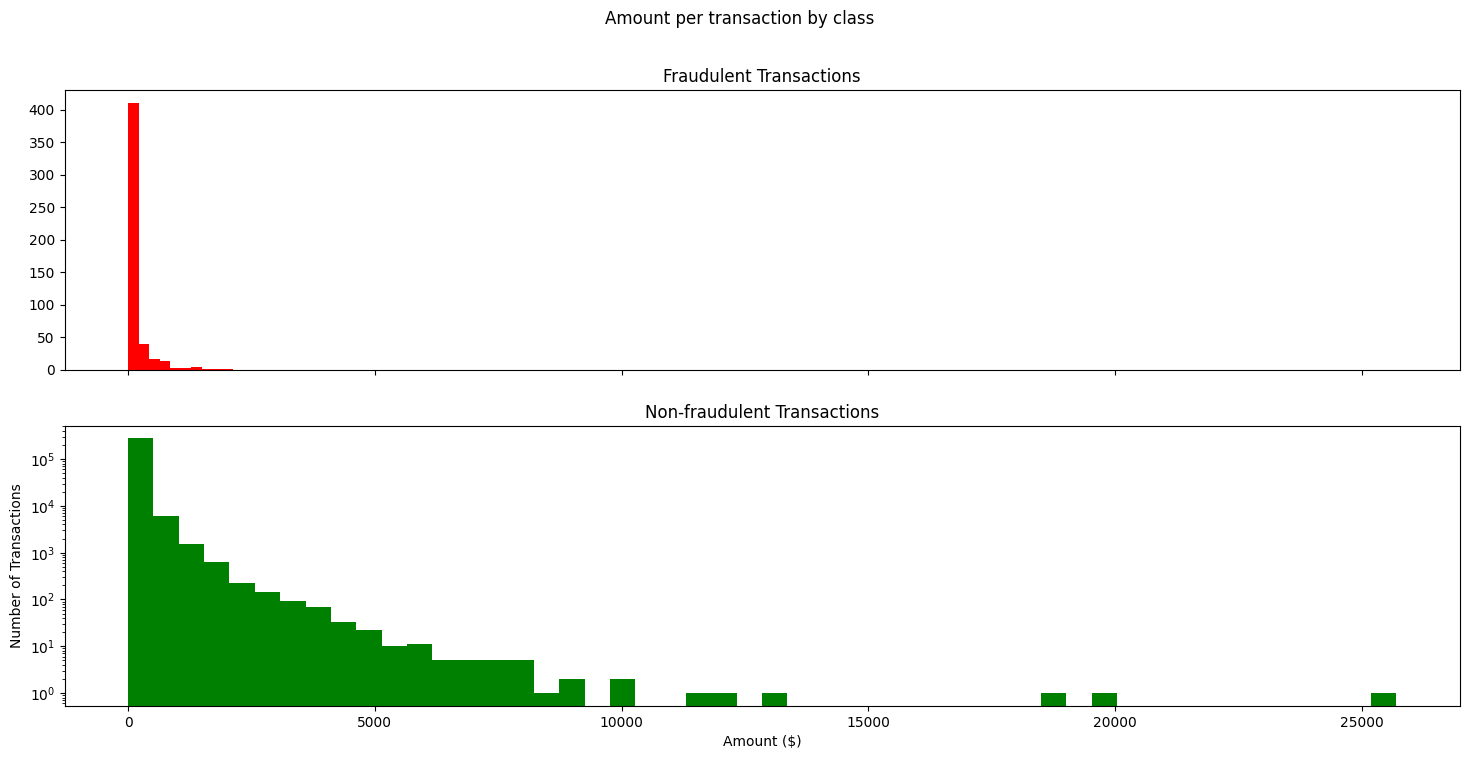

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (18,8), sharex = True)
fig.suptitle('Amount per transaction by class')
ax[0].hist(fraudulent.Amount, color = 'red')
ax[0].set_title('Fraudulent Transactions')
ax[1].hist(non_fraudulent.Amount, bins = 50, color = 'green')
ax[1].set_title('Non-fraudulent Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Upon examining the distribution of fraudulent and non-fraudulent amounts, it becomes evident that the range of fraudulent amounts (0 to 2125) is narrower compared to non-fraudulent amounts (0 to 25691). Additionally, fraudulent amounts exhibit higher mean and standard deviation values.

### Scaling 
We will first scale the columns comprise of Time and Amount. Time and Amount should be scaled as the other columns.

In [18]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

card_df['Amount'] = rob_scaler.fit_transform(card_df['Amount'].values.reshape(-1,1))
card_df['Time'] = rob_scaler.fit_transform(card_df['Time'].values.reshape(-1,1))


In [19]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### Splitting the dataset to Train and Test
Before initiating the Resampling techniques, it's essential to isolate the original dataframe. This step is crucial because, for testing purposes, our objective is to evaluate the model's performance on the original testing set, not on a testing set generated by undersampling or oversampling techniques. Although we split the data when applying UnderSampling or OverSampling techniques, our aim is to train the model using the undersampled or oversampled dataframes to enable pattern detection. However, the model should ultimately be tested on the original testing set to ensure accurate evaluation.

In [20]:
X = card_df.drop('Class', axis = 1)
y = card_df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

### Modeling different Algorithms

In [23]:
# plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test ):
    # Predict labels using the model
    y_pred = model.predict(X_test)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

In [24]:
# Model Results
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
    print("\n", classification_report(y_test, y_pred))

##### Logistic Regression model 

In [25]:
# illustrating with Logistic Regression
def train_log_Regn(X_train, y_train):
    lgr = LogisticRegression()
    grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
    cv=KFold(n_splits=5, random_state=None, shuffle=False)
    clf=GridSearchCV(lgr, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
    clf.fit(X_train,y_train)
    return clf


In [26]:
log_reg_imb = train_log_Regn(X_train, y_train)

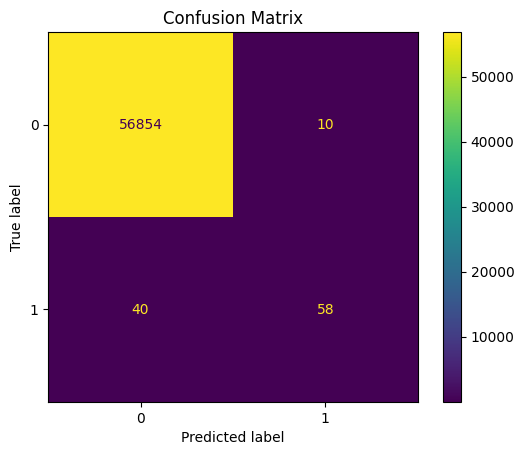

In [27]:
plot_confusion_matrix(log_reg_imb , X_test, y_test)

Based on the Confusion Matrix analysis, it is evident that the model performs well in predicting non-fraudulent transactions (label 0), as indicated by the high number of true negatives (TN). However, concerning fraudulent transactions (total 98), the model's performance is less satisfactory. Specifically, out of the 98 actual fraudulent transactions, the model correctly identifies 58 (true positives, TP). However, it misclassifies 40 fraudulent transactions as non-fraudulent (false negatives, FN), which is a significant concern.

In [28]:
evaluate_model(log_reg_imb , X_test, y_test)

Testing Accuracy:  0.9991222218320986

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



While the Logistic Regression model achieves a high accuracy score of 0.9991, caution is warranted due to the highly imbalanced nature of the data. The lower precision (0.85), recall (0.59), and F1-score (0.70) for the (label 1) fraudulent class indicate a struggle in correctly identifying fraudulent transactions. Although weighted and macro average scores are higher due to the dominance of the majority class, this doesn't necessarily imply good model fit. Therefore, further adjustments or alternative approaches may be necessary to improve performance, especially in capturing the characteristics of fraudulent transactions.

##### Random Forest Classifier
It is one of the ensemble techniques, which inherently handle class imbalance better than individual models.

In [29]:
def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
    rf_model.fit(X_train, y_train)
    return rf_model

In [30]:
rf_model = train_random_forest(X_train, y_train)

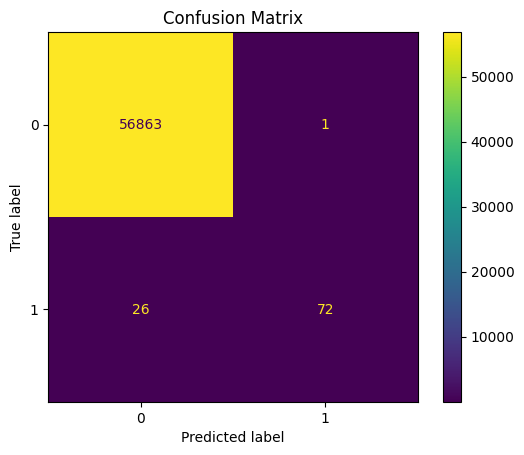

In [31]:
plot_confusion_matrix(rf_model , X_test, y_test)

As compared to the Logistic Regression model, RF classifier has shown significant improvement in predicting fraudulent transactions. We can see model has correctly classified 74 transactions(TP) out of total 98 fraudulents where LR's TP is 58. FN (24) & FP (2) has dcreased in RFC compared to LR (40) &  (10) repsectively.

In [32]:
evaluate_model(rf_model , X_test, y_test)

Testing Accuracy:  0.9995259997893332

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.73      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Logistic Regression model Vs Random Forest Classifier 
- Testing Accuracy: The testing accuracy of 0.9995 is slightly higher than the logistic reg accuracy of 0.9991.
- Precision, Recall, and F1-score: For the fraudulent class (label 1), precision has increased from 0.85 to 0.97, recall has increased from 0.59 to 0.76, and the F1-score has increased from 0.70 to 0.85.
- Macro Average: The macro-average precision, recall, and F1-score are 0.99, 0.88, and 0.93 respectively, compared to 0.93, 0.80, and 0.85 in the previous summary.


Overall, the new evaluation metrics show a slight improvement in accuracy and precision for the fraudulent class, while recall has notably increased. The macro-average metrics also show an improvement, indicating a better balance between precision and recall across both classes. However, weighted-average metrics remain unchanged, reflecting there's a still dominance of the non-fraudulent class in the dataset.

### Handling Class Imbalance
In our credit card dataset, the non-fraudulent class significantly outweighs the fraudulent class, resulting in imbalanced data leading to biased models that favor the majority (non-fraudulent) class.  Handling  this class imbalance is essential for ensuring the effectiveness of our models. Several techniques can help mitigate this issue:
1. Resampling Techniques:
- Undersampling: Reducing the size of the majority class to match the minority class.
- Oversampling: Increasing the size of the minority class by duplicating samples or generating synthetic samples.
- Advanced Sampling Techniques: Using advanced techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling) for oversampling the minority class with more sophistication.
2. Model Tuning: Fine-tuning model hyperparameters to optimize performance.
3. Ensemble Methods: Harnessing the power of ensemble techniques to combine multiple models for improved accuracy.
  

#### Performing Undersampling using NearMiss
NearMiss is an undersampling technique commonly used to address class imbalance problems in machine learning classification tasks. It aims to balance the class distribution by reducing the number of samples in the majority class, making it more comparable to the minority class.

Types of NearMiss: There are several variations of NearMiss, including NearMiss-1, NearMiss-2, and NearMiss-3. Each variant employs a different criterion for selecting samples from the majority class based on their proximity to minority class samples.

- NearMiss-1: NearMiss-1 selects samples from the majority class for which the average distance to the k nearest neighbors in the minority class is the smallest.

- NearMiss-2: NearMiss-2 selects samples from the majority class by focusing on the farthest samples from the decision boundary between the two classes. It retains samples that are closest to the minority class but farthest from the majority class.

- NearMiss-3: NearMiss-3 is similar to NearMiss-2 but considers a different criterion for selecting samples. It retains samples from the majority class that are closest to the centroids of the minority class.

In [33]:
# Undersampling the data
from collections import Counter
from imblearn.under_sampling import NearMiss

ns = NearMiss(version = 1, n_neighbors = 3)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit: ", Counter(y_train))
print("The number of classes after fit: ", Counter(y_train_ns))

The number of classes before fit:  Counter({0: 227451, 1: 394})
The number of classes after fit:  Counter({0: 394, 1: 394})


In [34]:
# Assuming X_train_ns and y_train_ns are numpy arrays
X_train_ns_df = pd.DataFrame(X_train_ns, columns=X.columns)
y_train_ns_df = pd.DataFrame(y_train_ns, columns=['Class'])

# Concatenating X_train_ns_df and y_train_ns_df horizontally
resampled_df = pd.concat([X_train_ns_df, y_train_ns_df], axis=1)

#### Correlation matrices:
Correlation matrices play a crucial role in understanding our data, especially in identifying features that significantly influence whether a transaction is fraudulent. It's essential to use the correct dataframe (such as a subsample) to analyze which features have a strong positive or negative correlation with fraud transactions.
Key Points:
1. Negative Correlations: Features like V17, V14, V12, and V10 exhibit negative correlations. Lower values in these features tend to be associated with a higher likelihood of a transaction being fraudulent.
2. Positive Correlations: Features such as V2, V4, V11, and V19 show positive correlations with fraud transactions. Higher values in these features are indicative of a higher probability of the transaction being fraudulent.

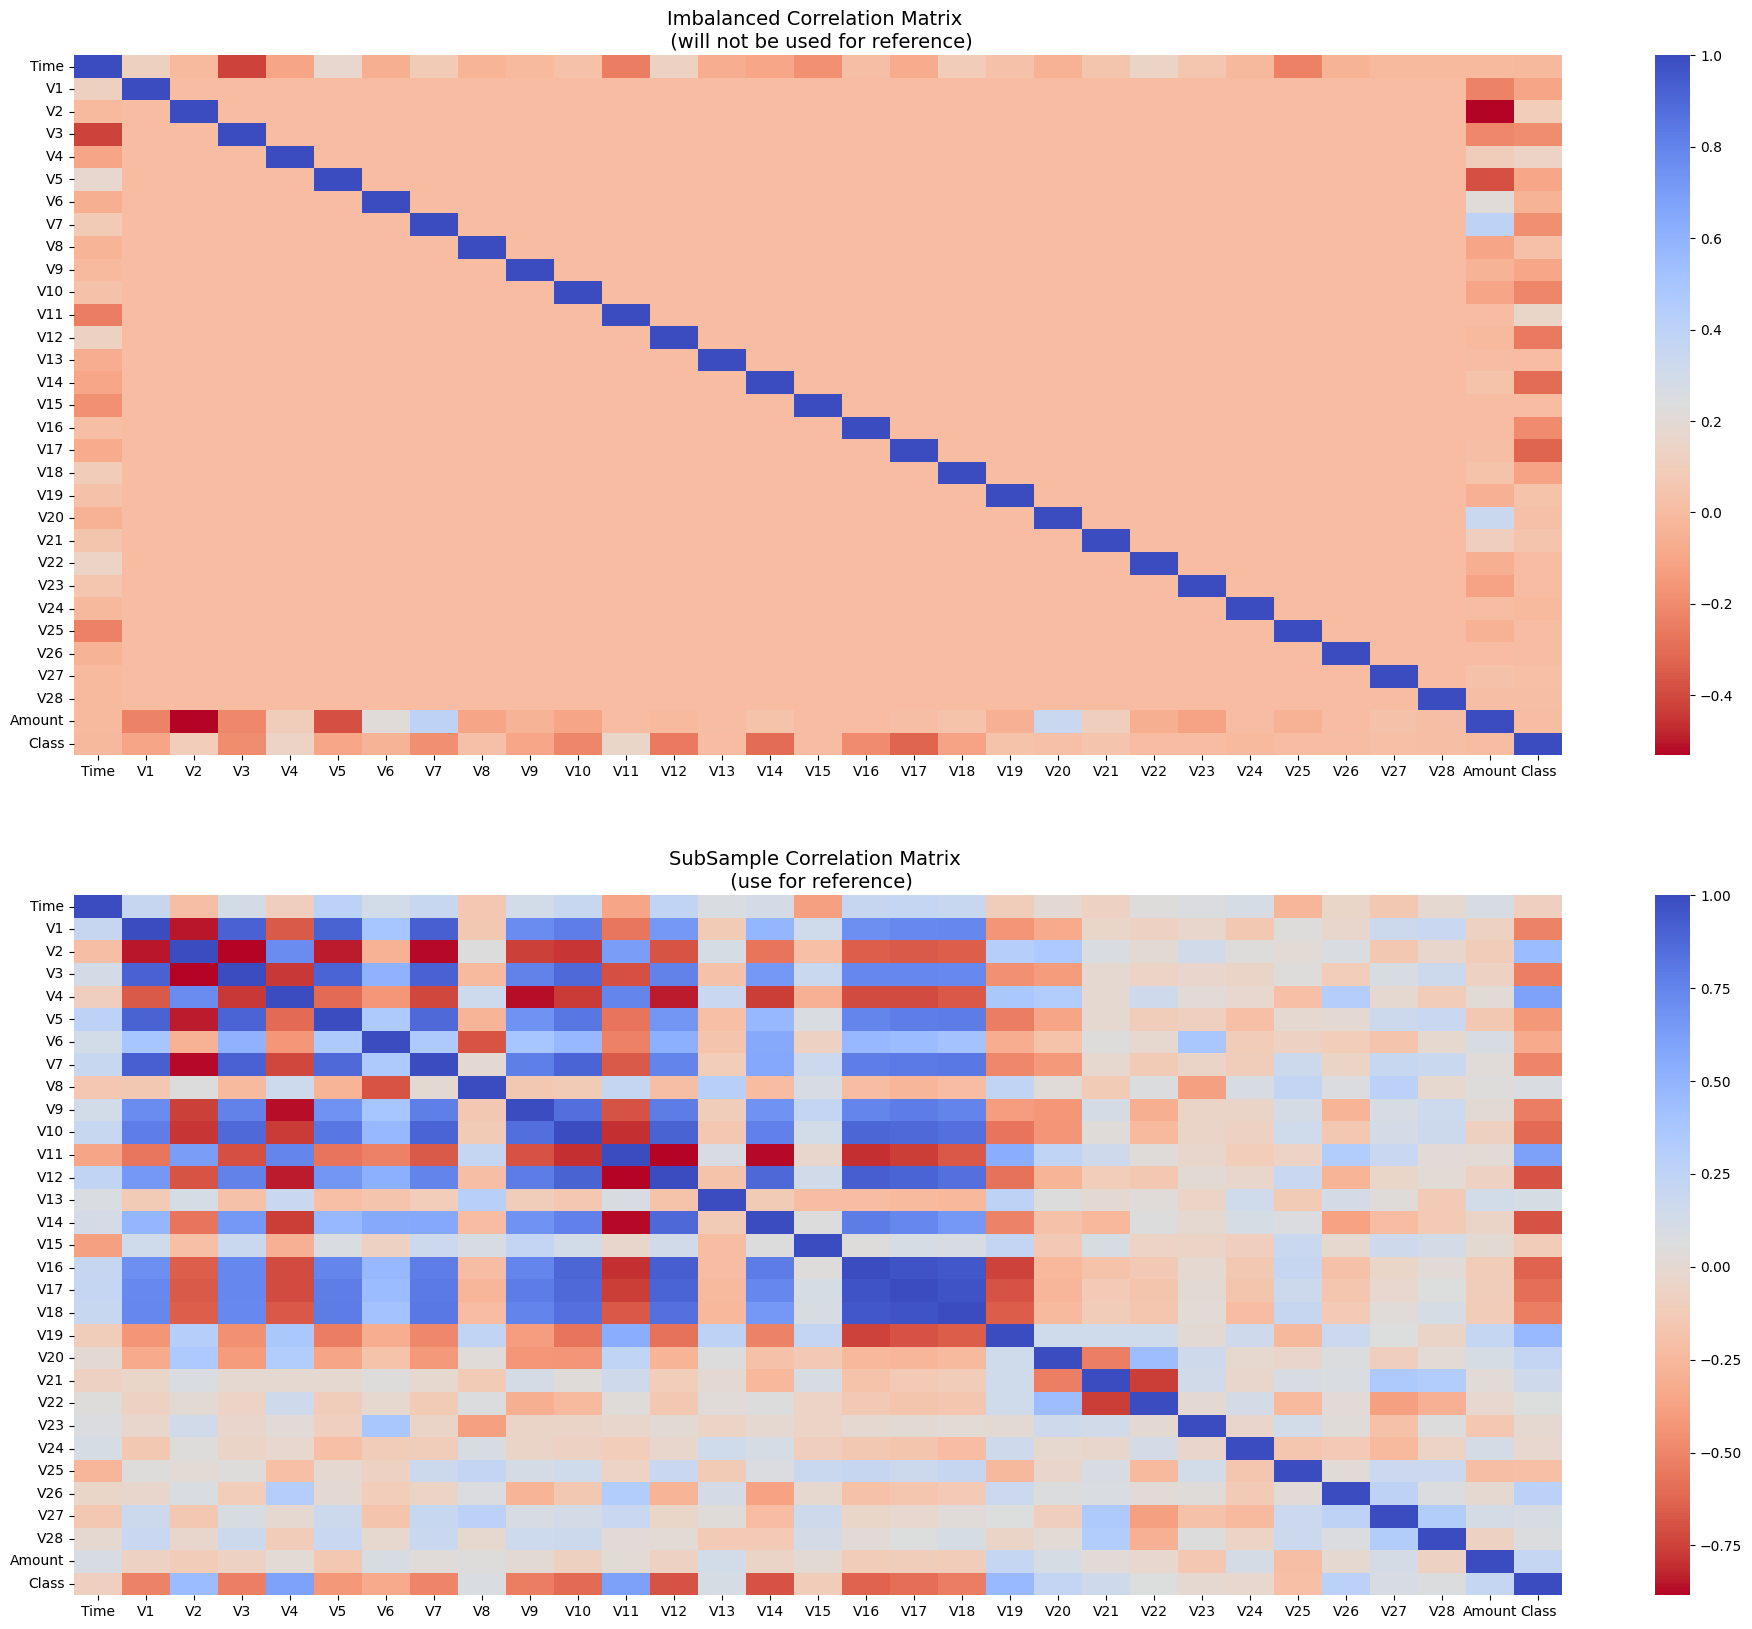

In [36]:
# Plotting Correaltion matrices
fig, ax = plt.subplots(2, 1, figsize = (24,20))

# Entire DataFrame
corr = card_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax[0])
ax[0].set_title("Imbalanced Correlation Matrix \n (will not be used for reference)", fontsize=14)

# For undersampled dataset
resampled_corr = resampled_df.corr()
sns.heatmap(resampled_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax[1])
ax[1].set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

### Checking different models on Undersampled data

In [37]:
# Training Logistic Regression model on undersampled data
lgr_ns = train_log_Regn(X_train_ns, y_train_ns)

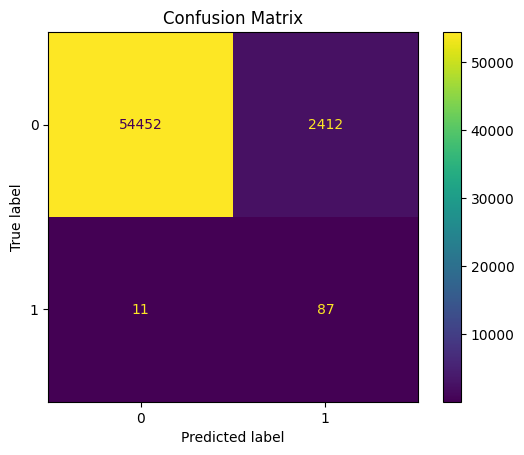

In [38]:
# Plotting confusion matrix for LR model
plot_confusion_matrix(lgr_ns, X_test, y_test)

In [39]:
# printing LR model results
evaluate_model(lgr_ns, X_test, y_test)

Testing Accuracy:  0.9574628699834977

               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.89      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [40]:
# Define KNeighborsClassifier model
def train_knn(X_train, y_train):
    knn = KNeighborsClassifier()
    knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    cv=KFold(n_splits=5, random_state=None, shuffle=False)
    clf=GridSearchCV(knn, knears_params, cv=cv, n_jobs=-1, scoring='f1_macro')
    clf.fit(X_train, y_train)
    return clf

In [41]:
# Training KNeighborsClassifier model on undersampled data
knn_model_ns = train_knn(X_train_ns, y_train_ns)

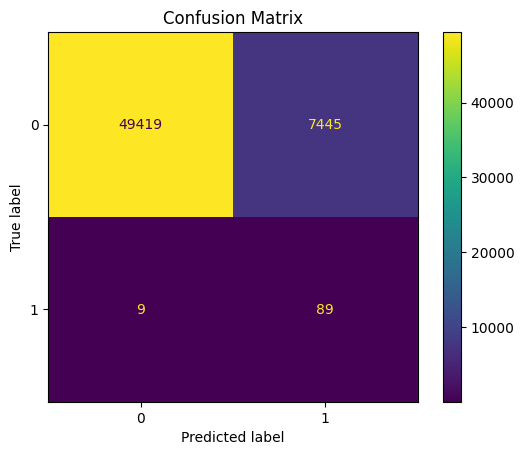

In [42]:
# Plotting Confusion matrix for KNN
plot_confusion_matrix(knn_model_ns, X_test, y_test)

In [43]:
# printing KNN model results
evaluate_model(knn_model_ns , X_test, y_test)

Testing Accuracy:  0.8691408307292581

               precision    recall  f1-score   support

           0       1.00      0.87      0.93     56864
           1       0.01      0.91      0.02        98

    accuracy                           0.87     56962
   macro avg       0.51      0.89      0.48     56962
weighted avg       1.00      0.87      0.93     56962



In [44]:
# illustrating with SVC 
def train_svc_cf(X_train, y_train):
    svc_cf = SVC()
    svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
    cv=KFold(n_splits=5, random_state=None, shuffle=False)
    clf=GridSearchCV(svc_cf, svc_params, cv=cv, n_jobs=-1, scoring='f1_macro')
    clf.fit(X_train,y_train)
    return clf

In [82]:
# Training SVC model on undersampled data
svc_model_ns = train_svc_cf(X_train_ns, y_train_ns)

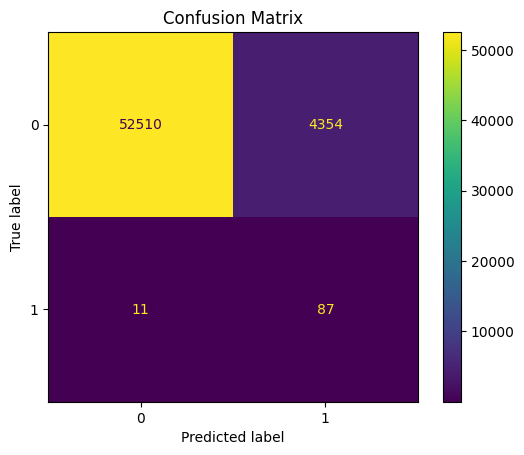

In [84]:
# Plotting Confusion matrix for SVC
plot_confusion_matrix(svc_model_ns, X_test, y_test)

In [47]:
# printing SVC model results
evaluate_model(svc_model_ns , X_test, y_test)

Testing Accuracy:  0.8691408307292581

               precision    recall  f1-score   support

           0       1.00      0.87      0.93     56864
           1       0.01      0.91      0.02        98

    accuracy                           0.87     56962
   macro avg       0.51      0.89      0.48     56962
weighted avg       1.00      0.87      0.93     56962



In [48]:
# Training RandomForestClassifier on Undersampled data
rf_model_ns = train_random_forest(X_train_ns, y_train_ns)

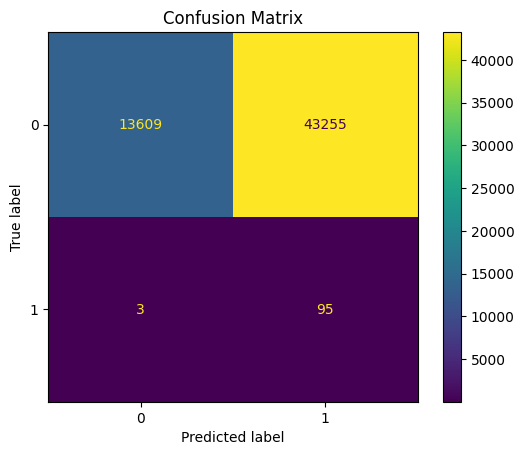

In [49]:
# Plotting Confusion matrix for RandomForestClassifier model on Undersampled data
plot_confusion_matrix(rf_model_ns, X_test, y_test)

In [50]:
# printing RandomForestClassifier model results
evaluate_model(rf_model_ns , X_test, y_test)

Testing Accuracy:  0.2405814402584179

               precision    recall  f1-score   support

           0       1.00      0.24      0.39     56864
           1       0.00      0.97      0.00        98

    accuracy                           0.24     56962
   macro avg       0.50      0.60      0.20     56962
weighted avg       1.00      0.24      0.39     56962



In [51]:
from sklearn.ensemble import AdaBoostClassifier

# Define Training AdaBoostClassifier model
def train_adaboost_cf(X_train, y_train):
    adaboost_model = AdaBoostClassifier(random_state = 2018, algorithm='SAMME.R', learning_rate=0.8, n_estimators = 100)
    adaboost_model.fit(X_train, y_train)
    return adaboost_model

In [52]:
# Training AdaBoostClassifier model on Undersampled data
adaboost_cf_ns = train_adaboost_cf(X_train_ns, y_train_ns)

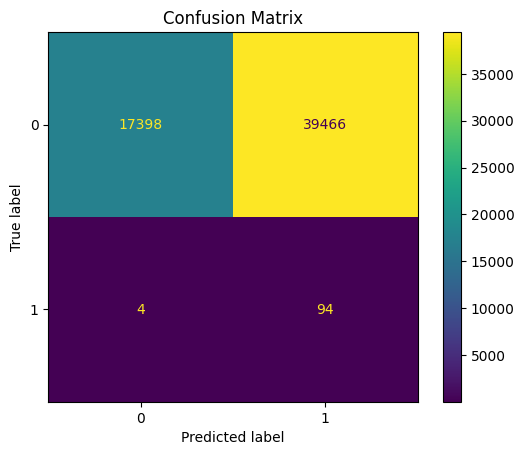

In [53]:
# Plotting Confusion matrix for AdaBoostClassifier model on Undersampled data
plot_confusion_matrix(adaboost_cf_ns, X_test, y_test)

In [54]:
# printing AdaBoostClassifier model results
evaluate_model(adaboost_cf_ns , X_test, y_test)

Testing Accuracy:  0.3070819142586286

               precision    recall  f1-score   support

           0       1.00      0.31      0.47     56864
           1       0.00      0.96      0.00        98

    accuracy                           0.31     56962
   macro avg       0.50      0.63      0.24     56962
weighted avg       1.00      0.31      0.47     56962



In [55]:
from xgboost import XGBClassifier

# Define Training XGBClassifier model
def train_xgboost(X_train, y_train):
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    return xgb_model

In [56]:
# Training XGBClassifier model on Undersampled data
xgb_model_ns = train_xgboost(X_train_ns, y_train_ns)

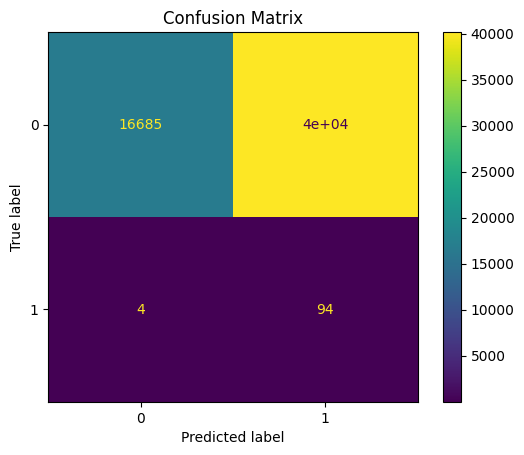

In [57]:
# Plotting Confusion matrix for XGBClassifier model on Undersampled data
plot_confusion_matrix(xgb_model_ns, X_test, y_test)

In [58]:
# printing XGBClassifier model results
evaluate_model(xgb_model_ns, X_test, y_test)

Testing Accuracy:  0.2945647975843545

               precision    recall  f1-score   support

           0       1.00      0.29      0.45     56864
           1       0.00      0.96      0.00        98

    accuracy                           0.29     56962
   macro avg       0.50      0.63      0.23     56962
weighted avg       1.00      0.29      0.45     56962



#### Results of Models trained on Undersampled data:
- The precision score for class 0 (representing non-fraudulent transactions) is consistently 100% across all models, indicating that when the model predicts a transaction as non-fraudulent, it is accurate 100% of the time.

- However, there are notable differences in the recall scores. For the XGBoost model, the recall is 29%, for AdaBoost it's 31%, and for Random Forest, it's 22%. This suggests that these models are missing a substantial portion of actual non-fraudulent transactions. In contrast, the logistic regression (LR) model achieves a recall of 96%, while K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) both achieve a recall of 87%, indicating better performance in capturing non-fraudulent transactions.
  
- The precision score for class 1 (representing fraudulent transactions) is nearly 0% across all models, suggesting that the models do not effectively identify any transactions as fraudulent. However, the recall is notably higher, with scores of 96% for XGBoost, AdaBoost, and Random Forest, and 91% for KNN and SVC, and 89% for LR. This indicates that the models successfully detect nearly all actual fraudulent transactions.
  
- The XGBoost, AdaBoost, and Random Forest models exhibit higher f1-scores for non-fraudulent transactions compared to fraudulent ones, with values ranging from 0.36 to 0.47 for class 0 and 0.00 for class 1. For class 0, the f1-score values range from 93% to 98%, with the Logistic Regression model achieving the highest f1-score, followed by the Support Vector Classifier and K-Nearest Neighbors models. However, for class 1, the f1-score values are considerably lower, ranging from 2% to 7% across these models, highlighting difficulties in correctly identifying fraudulent transactions.
  
- The testing accuracies for various models are as follows:

  - Logistic Regression: 95.75%
  - K-Nearest Neighbors (KNN): 86.91%
  - Support Vector Classifier (SVC): 86.91%
  - Random Forest: 22.21%
  - AdaBoost: 30.71%
  - XGBoost: 29.46%
    
  These values represent the percentage of correctly predicted outcomes on the testing dataset for each respective model. Among these models, Logistic  Regression demonstrates the highest testing accuracy, followed by K-Nearest Neighbors and Support Vector Classifier. Conversely, Random Forest exhibits notably lower testing accuracy compared to the other models.
  
Overall, the model shows high recall for fraudulent transactions but poor precision and f1-score, indicating that it is better at identifying fraud but struggles with accuracy in generalizing predictions.

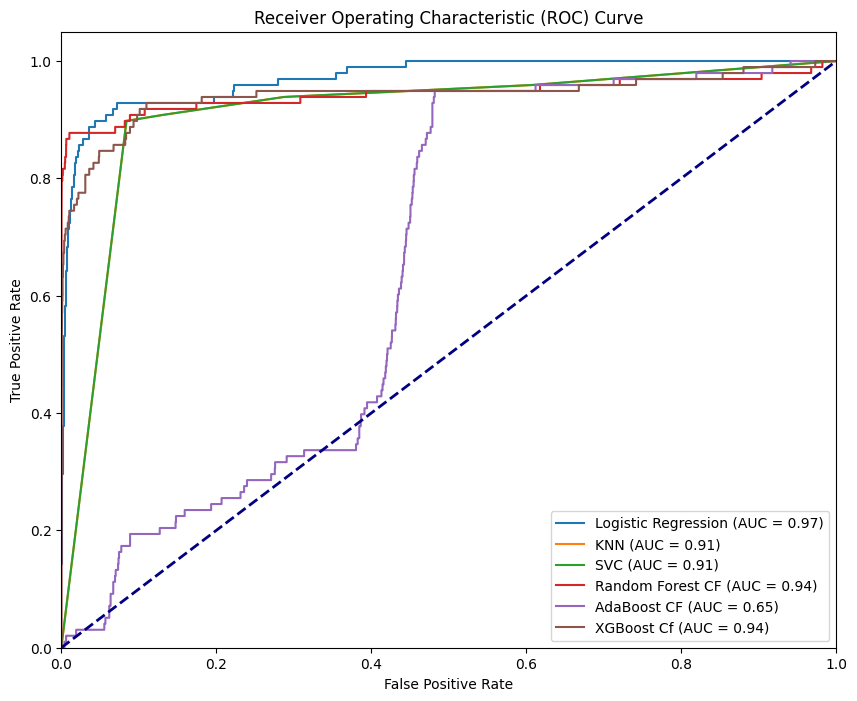

In [59]:
# dictionary for predicted probabilities of each model
y_pred_probas = {
    'Logistic Regression': lgr_ns.predict_proba(X_test)[:, 1],
    'KNN': knn_model_ns.predict_proba(X_test)[:, 1],
    'SVC': svc_model_ns.predict_proba(X_test)[:, 1],
    'Random Forest CF': rf_model_ns.predict_proba(X_test)[:, 1],
    'AdaBoost CF': adaboost_cf_ns.predict_proba(X_test)[:, 1],
    'XGBoost Cf': xgb_model_ns.predict_proba(X_test)[:, 1]
}

# Dictionary to store ROC AUC scores
roc_auc_scores = {}

# Dictionary to store fpr and tpr values for each model
roc_curves = {}

plt.figure(figsize=(10, 8))

# Iterate over each model
for model_name, y_pred_proba in y_pred_probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Store ROC AUC score and curve values
    roc_auc_scores[model_name] = roc_auc
    roc_curves[model_name] = (fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The results indicate the Area Under the Receiver Operating Characteristic Curve (ROC AUC) for each model.
- Logistic Regression has an AUC of 0.97, indicating that it performs very well in terms of separating the classes, with a high true positive rate and a low false positive rate.
- K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) both have an AUC of 0.91, suggesting they also perform well, but not as well as Logistic Regression.
- Random Forest and XGBoost have an AUC of 0.94, indicating strong performance similar to Logistic Regression.
- AdaBoost has the lowest AUC of 0.65, implying that it performs relatively poorly compared to the other models in distinguishing between classes.
  
In a ROC AUC plot, higher AUC values correspond to better model performance, with the curve being closer to the top-left corner of the plot. Therefore, the results suggest that Logistic Regression, Random Forest, and XGBoost are the top-performing models, while AdaBoost lags behind in terms of class separation ability.

##### The NearMiss undersampling technique did not perform well in our credit card fraud detection scenario for the following reasons:

- Loss of Information: NearMiss aggressively removes majority class samples that are close to minority class samples, leading to a significant loss of valuable information. This can hinder the ability of models to learn complex relationships present in the data.

- Model Complexity: Ensemble methods like Random Forest, AdaBoost, and XGBoost are adept at capturing complex patterns in data. However, when trained on a drastically reduced dataset due to undersampling, these models might struggling to learn effectively, resulting in suboptimal performance.

- Vulnerability to Noise: NearMiss may inadvertently retain noisy or irrelevant minority class samples while removing informative majority class samples. This can introduce noise into the training data, negatively impacting the performance of ensemble methods sensitive to data quality.

- Imbalanced Class Distribution: Despite attempting to balance the class distribution, NearMiss may still leave the dataset imbalanced, with the minority class underrepresented. Ensemble methods may struggle to learn from such imbalanced data, leading to biased predictions and reduced performance.

### Performing Over Sampling : SMOTE (Synthetic Minority Over-sampling Technique)
**We will use here SMOTETomek method** 

**SMOTETomek** is a hybrid resampling technique that combines the over-sampling method Synthetic Minority Over-sampling Technique (SMOTE) with the under-sampling method Tomek Links.

Here's a brief overview of how SMOTETomek works:

- **SMOTE (Synthetic Minority Over-sampling Technique):** This technique generates synthetic samples for the minority class by interpolating new instances between existing minority class samples. It helps address the class imbalance by increasing the number of minority class samples.

- **Tomek Links:** Tomek Links are pairs of instances from different classes that are nearest neighbors of each other. By removing the majority class instances from these pairs, Tomek Links can help clarify the decision boundary between classes and potentially improve the performance of classifiers.

- **Combination:** SMOTETomek combines the strengths of SMOTE and Tomek Links. First, it oversamples the minority class using SMOTE to increase its representation. Then, it undersamples both the majority and minority classes using Tomek Links to remove redundant and noisy samples, thereby improving the balance and quality of the dataset.

It can be an effective approach for improving classification accuracy and mitigating the impact of class imbalance.

In [71]:
# importing SMOTETomek
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [74]:
# Resampling traning data using SMOTETomek

smote_sampler = SMOTE(sampling_strategy=0.75)
tomek_sampler = TomekLinks()

os = SMOTETomek(sampling_strategy = 0.75, smote = smote_sampler, tomek = tomek_sampler, random_state = 42)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)


In [75]:
print("The number of classes before fit: ", Counter(y_train))
print("The number of classes after fit: ", Counter(y_train_os))

The number of classes before fit:  Counter({0: 227451, 1: 394})
The number of classes after fit:  Counter({0: 227451, 1: 170588})


##### We will check the performance of different models on resampled data

In [76]:
# Training Logistic Regression model on oversampled data
lgr_os = train_log_Regn(X_train_os, y_train_os)

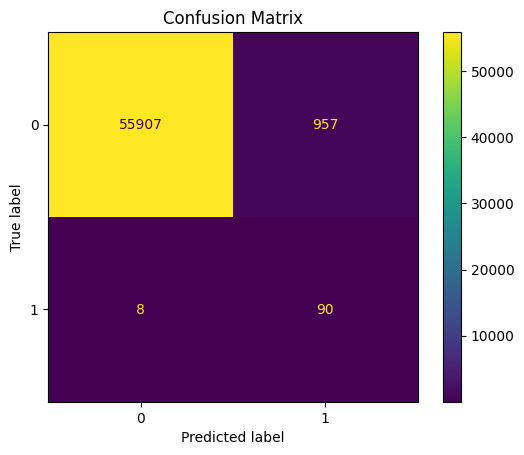

In [77]:
# Plotting confusion matrix for LR model
plot_confusion_matrix(lgr_os, X_test, y_test)

In [78]:
# printing LR model results
evaluate_model(lgr_os, X_test, y_test)

Testing Accuracy:  0.9830588813595028

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.92      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [79]:
# Training KNeighborsClassifier model on oversampled data
knn_model_os = train_knn(X_train_os, y_train_os)

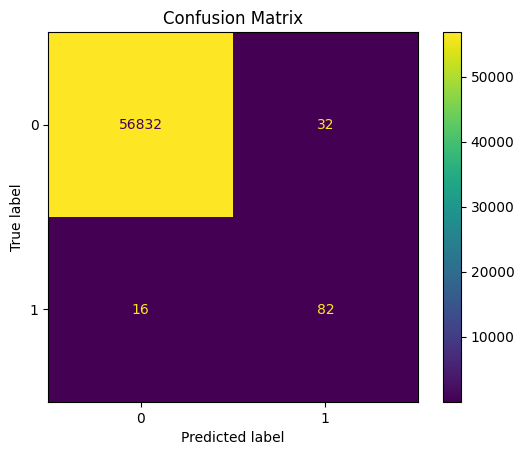

In [80]:
# Plotting confusion matrix for KNeighborsClassifier model
plot_confusion_matrix(knn_model_os, X_test, y_test)

In [81]:
# printing KNeighborsClassifier model results
evaluate_model(knn_model_os, X_test, y_test)

Testing Accuracy:  0.9991573329588147

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Training SVC model on oversampled data
svc_model_os = train_svc_cf(X_train_os, y_train_os)